<a href="https://colab.research.google.com/github/mohammadAbdin/week5-hw2-3-polynomial_regression-/blob/main/week5_hw2(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("column_3C_weka.csv")
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


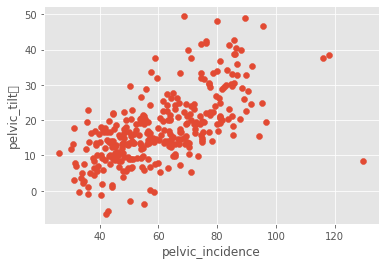

In [ ]:
x = data.pelvic_incidence.values.reshape(-1,1)
y = data.pelvic_tilt	.values.reshape(-1,1)

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("pelvic_tilt	")
plt.show()

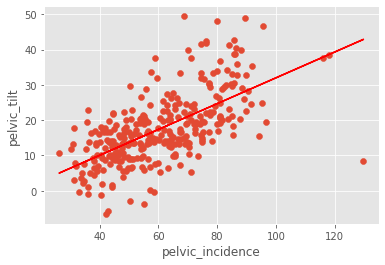

10 million TL pelvic_tilt estimation:  [[3648.86334464]]


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x,y)

#%% predict
y_head = lr.predict(x)

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("pelvic_tilt")

plt.plot(x,y_head,color="red",label ="linear")
plt.show()

print("10 million TL pelvic_tilt estimation: ",lr.predict([[10000]]))

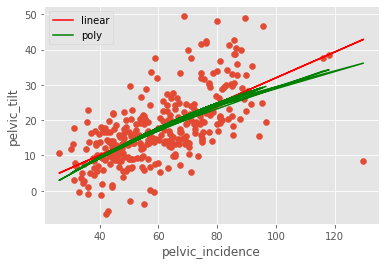

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 2)

x_polynomial = polynomial_regression.fit_transform(x)


# %% fit
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

# %%

y_head2 = linear_regression2.predict(x_polynomial)

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("pelvic_tilt")
plt.plot(x,y_head,color="red",label ="linear")

plt.plot(x,y_head2,color= "green",label = "poly")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

print("r_square score for linear regression: ", r2_score(y,y_head))

print("r_square score for polynomial regression: ", r2_score(y,y_head2))

r_square score for linear regression:  0.39589109702756153
r_square score for polynomial regression:  0.4009630198546933
